In [1]:
#Import das libs
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
#Leitura dos dados
data = pd.read_csv("data/lithology.csv",';') 

In [3]:
pd.set_option('display.float_format', str)
data.head()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,494.528,437641.96875,6470972.5,-469.50183110000006,19.480834961,-999.0,1.6114097834,1.7986813784,1.884185791,80.20085144,...,24.73569095158781,0.31484686817707136,0.15017183162707218,-0.0,-0.0,-0.0,0.0,0.0,6,68
1,494.68,437641.96875,6470972.5,-469.6538086,19.468799591,-999.0,1.6180702448,1.7956413031,1.8897935152,79.262886047,...,24.492376100271635,0.3185281394725607,0.1482686127827626,0.5277099599999815,-0.005607724200000108,0.9379653929999988,0.1519999999999868,-0.24331485131617114,6,68
2,494.832,437641.96875,6470972.5,-469.8057861,19.468799591,-999.0,1.6264585257,1.8007333279,1.8965227604,74.821998596,...,24.202298635769967,0.3229456493770365,0.13925763994167714,0.4298553499999969,-0.006729245199999846,4.440887450999995,0.1519999999999868,-0.29007746450166394,6,68
3,494.984,437641.96875,6470972.5,-469.9577942,19.459281921,-999.0,1.6215940714,1.8015166521,1.891912818,72.878921509,...,24.4007967435326,0.3199193863110002,0.1353149561758119,0.02418518000001768,0.004609942399999678,1.9430770870000058,0.15200000000004366,0.19849810776263155,6,68
4,495.136,437641.96875,6470972.5,-470.1097717,19.453100204000002,-999.0,1.6026790141999998,1.7952990532,1.8800340891,71.729141235,...,24.91676523082089,0.31212142368536505,0.13298194527730406,0.021087649999998348,0.01187872890000019,1.149780273999994,0.15199999999992994,0.5159684872882906,6,68


In [5]:
data.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
count,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,...,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0
mean,2184.086951095959,485629.1749489913,6679844.562264686,-2128.037360765099,-62.80492915947198,-454.9949117665094,-28.458640102683475,1.1894090199515186,-135.66863229441068,70.91369646125943,...,-127.91434778310224,-137.15619625857332,0.2641027743577723,-33.03348891766808,-137.73783057507882,-0.0007344169739636791,0.1530734046925062,-137.73872769291356,6.6275831666682326,41.295716998815045
std,997.1821047495898,34451.65543140187,129079.72938453442,972.5711673286426,266.7497707694643,508.71897488238756,188.0157197807781,149.55061285322387,345.1084519802169,34.23148647924061,...,348.29765638406735,344.51377331345117,0.18060155063537295,178.69261294513566,344.4248227186035,3.5169851789379787,0.3212287520437495,344.4256664274775,3.1259341649210177,22.8279009606735
min,136.086,426898.78125,6406641.0,-5395.5634770000015,-999.0,-999.0,-999.0,-999.0,-999.0,0.1092843339,...,-999.0,-999.0,0.0,-999.0,-999.0,-268.51174926000004,0.0,-999.0,0.0,-1.0
25%,1418.5967068,454801.84375,6591139.75,-2804.5516355,8.8741502762,-999.0,0.87117770315,0.8963877260499999,2.0004539489999997,47.6272182465,...,2.852750533056277,0.35092272067424274,0.12096605458316528,-0.7185020450000081,-0.016442537299999893,-1.380630492999991,0.15200000000004366,-0.5005838204908741,5.0,24.0
50%,2076.605,476907.75,6732205.0,-2030.515503,12.429907799,0.5516068339,1.4007121325,1.4281568527,2.2437815666,68.367630005,...,7.653390624796621,0.5256772741409357,0.2238262643002212,-0.01633453000000884,-0.002060651800000368,-0.0015487670000027265,0.15200000000004366,-0.06042549352165594,6.0,39.0
75%,2864.3925080000004,520153.1875,6784877.5,-1373.3436889999998,15.749314785,1.51092249155,2.5871003866,2.5378755331000002,2.4629778862,89.0355148315,...,15.508243563807326,0.6792460300613794,0.3778280928138881,0.5912170400000036,0.005912661550000031,1.371843337999998,0.15200000000004366,0.17404173789914523,9.0,66.0
max,5436.632,572632.75,6856661.0,-111.0859909,28.278999329,2193.904541,1988.616333,1999.887085,3.4578199387,1076.9638672,...,157.02912289276614,1.0,1.0,759.6499968611441,1.1206133366,266.54443359000004,269.34400000000005,110.70532532840778,13.0,69.0


In [8]:
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

65000.0    720803
30000.0    168937
65030.0    150455
70000.0     56320
80000.0     33329
99000.0     15245
70032.0     10513
88000.0      8213
90000.0      3820
74000.0      1688
86000.0      1085
93000.0       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

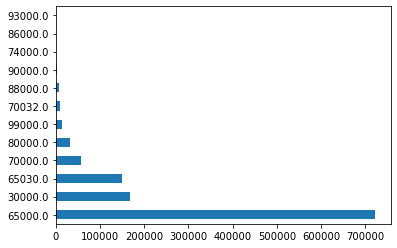

In [9]:
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts().plot(kind = 'barh')

In [10]:
#Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
#       'RHOB', '3GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
#      'MUDWEIGHT', 'RMIC', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'Carbon_Index',
#       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
#       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
#       'FORMATION_encoded'],
#      dtype='object')

data.corr()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
DEPTH_MD,1.0,-0.0819037843543615,0.24974516491576274,-0.9878898931591696,0.24228656338536927,0.07296065036159242,0.05586354803696833,0.0628617203278668,0.26739935189164377,0.0982817786527117,...,0.2528012343190198,0.2671596692096795,0.04482983745861071,0.2159838368420734,0.26686816321778384,0.00043246587827933455,0.0024448354449094316,0.2668683902088381,0.056806771476690325,-0.2939979485870154
X_LOC,-0.0819037843543615,1.0,0.41687468666746946,0.08587702043883577,-0.24981936528219134,-0.16460831039987422,-0.04430307326710763,0.05477955767681561,0.09853280237323603,0.2311902145404378,...,0.09684980741467185,0.09848476648558123,0.167772977761011,-0.07124828963117748,0.09843513927705184,-0.0002873500444498307,0.0009737504954764436,0.09843402140853871,0.09492288758927875,-0.22515142676223737
Y_LOC,0.24974516491576274,0.41687468666746946,1.0,-0.25962317672858753,-0.14818102761524918,-0.17565026276121934,0.10994130109115977,0.009231210387407733,0.10605590416777923,0.20645338995155152,...,0.10234648041388915,0.10596477026027432,0.13175986690019229,0.04783152975035586,0.1058514761790346,-0.00018377625449477613,0.002193993329189411,0.10585100559979665,0.02458497044380584,-0.16386011903930378
Z_LOC,-0.9878898931591696,0.08587702043883577,-0.25962317672858753,1.0,-0.23439065254550676,-0.08860963160369764,-0.08783127668202087,-0.11100962309900536,-0.2774825875386866,-0.1015294315872954,...,-0.26297056442632444,-0.2772469553604718,-0.04370307322649287,-0.2083892426283952,-0.2769511501576265,-0.0004144602807345328,-0.0025092405617043803,-0.2769513006087813,-0.044176325108347334,0.29177146021238404
CALI,0.24228656338536927,-0.24981936528219134,-0.14818102761524918,-0.23439065254550676,1.0,0.23085889379498087,0.20018709661961548,0.059856055943407746,0.29062309233530914,-0.13147904369031696,...,0.2881042056973987,0.29059178845199957,-0.13320376621136276,0.3943635581436789,0.29046688299009865,0.000167157576187923,0.00033843543195942135,0.29046617868234137,0.05522716888534808,0.0174842766625057
RSHA,0.07296065036159242,-0.16460831039987422,-0.17565026276121934,-0.08860963160369764,0.23085889379498087,1.0,0.03844717173451164,0.04112158155378359,0.11386041808186012,-0.043931877476474104,...,0.11253708220824228,0.11391521752275138,-0.06352059552008768,0.08876003533306699,0.11381845142706905,-0.00039835798045296394,-0.0016634895071933875,0.11381955840614595,-0.011004380639581202,0.001706151252450675
RMED,0.05586354803696833,-0.04430307326710763,0.10994130109115977,-0.08783127668202087,0.20018709661961548,0.03844717173451164,1.0,0.0937799286613289,0.204209794362476,0.11714961148693707,...,0.2047815501149625,0.20421855011359874,0.08740552396817348,0.3507218766846578,0.20432837128854142,0.0012243742978346817,0.00017514012139802754,0.2043234415705519,-0.031007049948728983,-0.02234680058173094
RDEP,0.0628617203278668,0.05477955767681561,0.009231210387407733,-0.11100962309900536,0.059856055943407746,0.04112158155378359,0.0937799286613289,1.0,0.11398775712122694,0.009550229408864226,...,0.114446500795589,0.11399444392521939,0.003944188475401631,0.09066510010018941,0.11400300732222209,0.0006615446127881132,0.0003252315922464783,0.11400384981790701,0.045048147200426894,-0.00623900437755596
RHOB,0.26739935189164377,0.09853280237323603,0.10605590416777923,-0.2774825875386866,0.29062309233530914,0.11386041808186012,0.204209794362476,0.11398775712122694,1.0,-0.00258221919288915,...,0.9997273941497861,0.9999999008571071,-0.06267443912272554,0.46241796166920235,0.9995829120395333,0.00040763777724210393,0.000908408875253101,0.9995793328087291,0.02236078900636516,-0.12774900438153763
GR,0.0982817786527117,0.2311902145404378,0.20645338995155152,-0.1015294315872954,-0.13147904369031696,-0.043931877476474104,0.11714961148693707,0.009550229408864226,-0.00258221919288915,1.0,.

In [11]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DCAL,DRHO,MUDWEIGHT,RMIC,FORCE_2020_LITHOFACIES_LITHOLOGY,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
DEPTH_MD,1.000000,-0.081904,0.249745,-0.987890,0.242287,0.072961,0.055864,0.062862,0.267399,0.098282,0.414375,0.201044,0.086242,-0.212204,-0.618097,-0.031847,0.253296,0.249273,-0.182790,0.146459,-0.007422,0.252801,0.267160,0.044830,0.215984,0.266868,0.000432,0.002445,0.266868,0.056807,-0.293998
X_LOC,-0.081904,1.000000,0.416875,0.085877,-0.249819,-0.164608,-0.044303,0.054780,0.098533,0.231190,0.089433,-0.035485,-0.076769,-0.121053,-0.092630,-0.078123,-0.215753,0.055254,-0.333802,0.223622,-0.019755,0.096850,0.098485,0.167773,-0.071248,0.098435,-0.000287,0.000974,0.098434,0.094923,-0.225151
Y_LOC,0.249745,0.416875,1.000000,-0.259623,-0.148181,-0.175650,0.109941,0.009231,0.106056,0.206453,0.068874,0.071257,0.030885,-0.076501,-0.167017,-0.274776,-0.143624,0.090255,-0.738548,0.059190,-0.034079,0.102346,0.105965,0.131760,0.047832,0.105851,-0.000184,0.002194,0.105851,0.024585,-0.163860
Z_LOC,-0.987890,0.085877,-0.259623,1.000000,-0.234391,-0.088610,-0.087831,-0.111010,-0.277483,-0.101529,-0.411152,-0.197759,-0.081243,0.174611,0.615375,0.038685,-0.245064,-0.256565,0.193531,-0.150293,0.019270,-0.262971,-0.277247,-0.043703,-0.208389,-0.276951,-0.000414,-0.002509,-0.276951,-0.044176,0.291771
CALI,0.242287,-0.249819,-0.148181,-0.234391,1.000000,0.230859,0.200187,0.059856,0.290623,-0.131479,0.159466,0.253697,0.336849,0.117929,-0.093683,0.061482,0.911076,0.281891,0.172453,0.095982,-0.038173,0.288104,0.290592,-0.133204,0.394364,0.290467,0.000167,0.000338,0.290466,0.055227,0.017484
RSHA,0.072961,-0.164608,-0.175650,-0.088610,0.230859,1.000000,0.038447,0.041122,0.113860,-0.043932,0.108301,-0.048833,0.068859,0.262062,-0.077242,-0.000514,0.211634,0.083668,0.202040,0.166244,-0.041135,0.112537,0.113915,-0.063521,0.088760,0.113818,-0.000398,-0.001663,0.113820,-0.011004,0.001706
RMED,0.055864,-0.044303,0.109941,-0.087831,0.200187,0.038447,1.000000,0.093780,0.204210,0.117150,0.087206,0.196880,0.354425,0.248956,-0.084409,-0.014198,0.178310,0.172003,-0.063313,0.075098,-0.083413,0.204782,0.204219,0.087406,0.350722,0.204328,0.001224,0.000175,0.204323,-0.031007,-0.022347
RDEP,0.062862,0.054780,0.009231,-0.111010,0.059856,0.041122,0.093780,1.000000,0.113988,0.009550,0.086625,0.014515,0.076234,0.023633,-0.049338,0.004839,0.055512,0.106038,0.003755,0.022012,0.009211,0.114447,0.113994,0.003944,0.090665,0.114003,0.000662,0.000325,0.114004,0.045048,-0.006239
RHOB,0.267399,0.098533,0.106056,-0.277483,0.290623,0.113860,0.204210,0.113988,1.000000,-0.002582,0.474023,0.458521,0.424886,0.074638,-0.336723,-0.058474,0.291568,0.882447,-0.062072,0.084565,-0.023634,0.999727,1.000000,-0.062674,0.462418,0.999583,0.000408,0.000908,0.999579,0.022361,-0.127749
GR,0.098282,0.231190,0.206453,-0.101529,-0.131479,-0.043932,0.117150,0.009550,-0.002582,1.000000,0.169099,0.049547,-0.077324,-0.161919,-0.182325,0.034934,-0.093328,-0.026357,-0.119144,0.153378,0.163939,-0.006083,-0.002662,0.583831,-0.074397,-0.002677,-0.051292,-0.000304,-0.002682,0.062451,-0.172180


In [13]:
#classes

classes = [30000, 65030, 65000, 80000, 74000, 70000, 70032, 88000, 86000, 99000, 90000, 93000]

# Fazendo o mapeamento das classes para indexs e vice-versa
class_to_idx_map = {clazz: index for index, clazz in enumerate(classes)}
idx_to_class_map = {value: key for key, value in class_to_idx_map.items()}

# fazendo a substituição
y = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].apply(lambda x: class_to_idx_map[x])
y.value_counts()

2     720803
0     168937
1     150455
5      56320
3      33329
9      15245
6      10513
7       8213
10      3820
4       1688
8       1085
11       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [ ]:
# Tentativa de normalizar os dados com StandardScaler e MinMaxScaler

In [14]:
data.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'Carbon_Index',
       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
       'FORMATION_encoded'],
      dtype='object')

In [15]:
toNormalize = data[['DEPTH_MD','CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC','Carbon_Index',
       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
       'FORMATION_encoded']]

In [16]:
trans = StandardScaler()
#trans2 = MinMaxScaler()
toNormalize = trans.fit_transform(toNormalize)
#toNormalize = trans2.fit_transform(toNormalize)

In [17]:
dataset = pd.DataFrame(toNormalize, columns=['DEPTH_MD','CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC','Carbon_Index',
       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
       'FORMATION_encoded'])
dataset

,DEPTH_MD,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,-1.694334128909411,0.3084756138032973,-1.0693631405015405,0.15993376918691346,0.004074022881509362,0.39857869621496994,0.2713045766070431,-1.3745627732845607,0.8909950033845225,0.40438960126020246,...,0.43827485239517355,0.39902933495890625,-0.6308417120290115,0.18486216348815823,0.39990697628745736,0.00020882012585052832,-0.47652481014254655,0.3999086013497214,-0.20076668337802658,1.1698094561695116
1,-1.6941816993138488,0.30843049520729493,-1.0693631405015405,0.15996919422612227,0.004053694803003962,0.39859494538697154,0.24390390283747143,-1.3745627732845607,0.8879129364163525,0.4018095302823455,...,0.43757626901170327,0.39904002037456493,-0.6413799363720513,0.1878153364074035,0.3998906948633975,0.2669047957820268,-0.0033415600073469515,0.3992021645798508,-0.20076668337802658,1.1698094561695116
2,-1.6940292697182866,0.30843049520729493,-1.0693631405015405,0.16001380903010226,0.00408774365695368,0.3986144443242936,0.11417277501510865,-1.3745627732845607,0.8943658674024559,0.39970788847666205,...,0.4367434250832547,0.39905284282792863,-0.6912741740380538,0.18726772198626337,0.3998874386478024,1.2629065916668893,-0.0033415600073469515,0.3990663946947379,-0.20076668337802658,1.1698094561695116
3,-1.6938768401227242,0.3083948150489272,-1.0693631405015405,0.15998793642549455,0.004092981512684681,0.39860108636582364,0.05740989040619123,-1.3745627732845607,0.9136741280728121,0.3995896426868492,...,0.4373133347249521,0.3990440586671979,-0.7131050245272529,0.1849975087043507,0.3999203607593802,0.5526927852699974,-0.003341560007169995,0.4004849178438224,-0.20076668337802658,1.1698094561695116
4,-1.6937244105271618,0.3083716408222999,-1.0693631405015405,0.15988733278819292,0.004051406279809925,0.3985666660729968,0.023821493190599487,-1.3745627732845607,0.9263521440021785,0.3994865412904757,...,0.43879473633140614,0.3990214239670475,-0.7260230304185571,0.18498017429263597,0.39994146489916776,0.32713108639826344,-0.003341560007523994,0.4014066566864312,-0.20076668337802658,1.1698094561695116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,0.9880099783824604,0.26702227135864964,-1.0693631405015405,-5.162024620119037,-6.687968823281459,0.40044419138268683,0.19692998197518893,-1.3745627732845607,0.8581541113529022,-0.0484058405514562,...,0.3783204284131475,0.400747934934949,-0.4183979025910817,0.2168145003045298,0.3997615707557143,-4.289747832032567,-0.003341560008585645,0.39632234397826605,1.3987558503753403,-1.5023602786694208
1170507,0.9881624079780227,0.26685759921052743,-1.0693631405015405,-5.162024620119037,-6.687968823281459,0.40047209349159796,0.13000436952753125,-1.3745627732845607,0.8630482201312076,-0.05346181606948839,...,0.37765459975413007,0.4007987263577574,-0.45846057550773744,0.19064927946611557,0.39987901879723564,0.651608550592924,-0.003341560007169995,0.39923528752879,1.3987558503753403,-1.5023602786694208
1170508,0.9883148375735851,0.26674889986206246,-1.0693631405015405,-5.162024620119037,-6.687968823281459,0.4003395177132259,-0.13031440096770056,-1.3745627732845607,0.8671307923219693,-0.028553484074456195,...,0.3808641211877859,0.4005573929003148,-0.6142912862774442,0.1563518580963276,0.4000398152079594,2.533940985352361,-0.003341560007169995,0.40315420381904876,1.3987558503753403,-1.5023602786694208
1170509,0.9884672671691475,0.266612181937345,-1.0693631405015405,-5.162024620119037,-6.687968823281459,0.40021109118852605,-0.44195820099571365,-1.3745627732845607,0.8668374303726565,-0.0021432524053985416,...,0.3840876132603159,0.4003236125098562,-0.8008459276233212,0.15463276994610947,0.4000356577186693,3.033497271520324,-0.003341560007169995,0.4031683315140854,1.3987558503753403,-1.5023602786694208


In [18]:
# dados de entrada
#X = data.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY'], axis=1)
#X

# 'X_LOC', 'Y_LOC', 'Z_LOC'
#dataset['X_LOC'] = data['X_LOC']
#dataset['Y_LOC'] = data['Y_LOC']
#dataset['Z_LOC'] = data['Z_LOC']
X = dataset

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   DEPTH_MD            1170511 non-null  float64
 1   CALI                1170511 non-null  float64
 2   RSHA                1170511 non-null  float64
 3   RMED                1170511 non-null  float64
 4   RDEP                1170511 non-null  float64
 5   RHOB                1170511 non-null  float64
 6   GR                  1170511 non-null  float64
 7   NPHI                1170511 non-null  float64
 8   PEF                 1170511 non-null  float64
 9   DTC                 1170511 non-null  float64
 10  SP                  1170511 non-null  float64
 11  BS                  1170511 non-null  float64
 12  ROP                 1170511 non-null  float64
 13  DCAL                1170511 non-null  float64
 14  DRHO                1170511 non-null  float64
 15  MUDWEIGHT      

In [20]:
# adicionando , stratify=y
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42, stratify=y)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [51]:
"""
#REGRESSÃO LOGÍSTICA MULTICLASS (SOFTMAX REGRESSION)
"""

# RECEITA DE TREINAMENTO
# 1 - DESIGN DO MODELO (INPUT, OUTPUT, FORWARD PASS)
# 2 - DEFINIÇAO DA FUNÇÃO DE CUSTO E OTIMIZADOR
# 3 - LOOP DE TREINAMENTO:
#     - FORWARD PASS: CALCULAR A PREDIÇÃO E O CUSTO
#     - BACKWARPASS: CALCULAR OS GRADIENTES
#     - ATUALIZAR OS PESOS

# CLASS DE REGRESSÃO LOGÍSTICA

class ModeloInicial(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        input_size = 27
        hidden_neurons = 320
        hidden_neurons2 = 220
        hidden_neurons3 = 220
       # hidden_neurons4 = 220
        output_size = 12
        
        self.layer1 = nn.Linear(input_size, hidden_neurons)         
        self.layer2 = nn.Linear(hidden_neurons, hidden_neurons2)
        self.layer3 = nn.Linear(hidden_neurons2, hidden_neurons3)
        self.layer4 = nn.Linear(hidden_neurons3, hidden_neurons3)
        self.saida = nn.Linear(hidden_neurons3, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.saida(x)
        return x

# DEFINICIÇÃO DE MODELO
model = ModeloInicial()
model

ModeloInicial(
  (layer1): Linear(in_features=27, out_features=320, bias=True)
  (layer2): Linear(in_features=320, out_features=220, bias=True)
  (layer3): Linear(in_features=220, out_features=220, bias=True)
  (layer4): Linear(in_features=220, out_features=220, bias=True)
  (saida): Linear(in_features=220, out_features=12, bias=True)
)

Epoch: 0 Loss: 2.462651491165161
Epoch: 1 Loss: 2.4103758335113525
Epoch: 2 Loss: 2.363898992538452
Epoch: 3 Loss: 2.3132002353668213
Epoch: 4 Loss: 2.266756534576416
Epoch: 5 Loss: 2.207631826400757
Epoch: 6 Loss: 2.1481821537017822
Epoch: 7 Loss: 2.075674057006836
Epoch: 8 Loss: 1.9966224431991577
Epoch: 9 Loss: 1.9135159254074097
Epoch: 10 Loss: 1.8261046409606934
Epoch: 11 Loss: 1.7361446619033813
Epoch: 12 Loss: 1.649617075920105
Epoch: 13 Loss: 1.5712710618972778
Epoch: 14 Loss: 1.506553292274475
Epoch: 15 Loss: 1.4593744277954102
Epoch: 16 Loss: 1.4308927059173584
Epoch: 17 Loss: 1.4182024002075195
Epoch: 18 Loss: 1.4119116067886353
Epoch: 19 Loss: 1.404861569404602
Epoch: 20 Loss: 1.3924261331558228
Epoch: 21 Loss: 1.3737553358078003
Epoch: 22 Loss: 1.351280689239502
Epoch: 23 Loss: 1.3280963897705078
Epoch: 24 Loss: 1.3090115785598755
Epoch: 25 Loss: 1.295695185661316
Epoch: 26 Loss: 1.287904143333435
Epoch: 27 Loss: 1.2830665111541748
Epoch: 28 Loss: 1.278346061706543
Epoch: 

Epoch: 232 Loss: 0.5887977480888367
Epoch: 233 Loss: 0.587222158908844
Epoch: 234 Loss: 0.5859275460243225
Epoch: 235 Loss: 0.5852187871932983
Epoch: 236 Loss: 0.583672285079956
Epoch: 237 Loss: 0.5825159549713135
Epoch: 238 Loss: 0.5816932916641235
Epoch: 239 Loss: 0.5802180171012878
Epoch: 240 Loss: 0.5791122317314148
Epoch: 241 Loss: 0.578233540058136
Epoch: 242 Loss: 0.576876163482666
Epoch: 243 Loss: 0.5757696628570557
Epoch: 244 Loss: 0.5748581886291504
Epoch: 245 Loss: 0.5735910534858704
Epoch: 246 Loss: 0.5724554657936096
Epoch: 247 Loss: 0.5715147256851196
Epoch: 248 Loss: 0.5703532695770264
Epoch: 249 Loss: 0.5691897869110107
Epoch: 250 Loss: 0.5682083368301392
Epoch: 251 Loss: 0.5671539306640625
Epoch: 252 Loss: 0.5659789443016052
Epoch: 253 Loss: 0.5649396181106567
Epoch: 254 Loss: 0.5639529824256897
Epoch: 255 Loss: 0.5628393888473511
Epoch: 256 Loss: 0.5617331266403198
Epoch: 257 Loss: 0.5607115626335144
Epoch: 258 Loss: 0.5596985816955566
Epoch: 259 Loss: 0.5586136579513

Epoch: 459 Loss: 0.4343852698802948
Epoch: 460 Loss: 0.43404269218444824
Epoch: 461 Loss: 0.43369317054748535
Epoch: 462 Loss: 0.4334302246570587
Epoch: 463 Loss: 0.43318095803260803
Epoch: 464 Loss: 0.43313512206077576
Epoch: 465 Loss: 0.43327227234840393
Epoch: 466 Loss: 0.4338463842868805
Epoch: 467 Loss: 0.435004860162735
Epoch: 468 Loss: 0.4361720085144043
Epoch: 469 Loss: 0.4371013045310974
Epoch: 470 Loss: 0.4350595474243164
Epoch: 471 Loss: 0.43196427822113037
Epoch: 472 Loss: 0.4297775328159332
Epoch: 473 Loss: 0.43030381202697754
Epoch: 474 Loss: 0.4319157004356384
Epoch: 475 Loss: 0.4317685663700104
Epoch: 476 Loss: 0.4298999607563019
Epoch: 477 Loss: 0.428094744682312
Epoch: 478 Loss: 0.42829787731170654
Epoch: 479 Loss: 0.4292988181114197
Epoch: 480 Loss: 0.42886602878570557
Epoch: 481 Loss: 0.427405446767807
Epoch: 482 Loss: 0.42647695541381836
Epoch: 483 Loss: 0.42666885256767273
Epoch: 484 Loss: 0.4269978702068329
Epoch: 485 Loss: 0.4265460669994354
Epoch: 486 Loss: 0.4

Epoch: 685 Loss: 0.3774031102657318
Epoch: 686 Loss: 0.37724769115448
Epoch: 687 Loss: 0.37707021832466125
Epoch: 688 Loss: 0.37688714265823364
Epoch: 689 Loss: 0.3766719400882721
Epoch: 690 Loss: 0.37647315859794617
Epoch: 691 Loss: 0.3762565553188324
Epoch: 692 Loss: 0.37605035305023193
Epoch: 693 Loss: 0.3758474588394165
Epoch: 694 Loss: 0.37565186619758606
Epoch: 695 Loss: 0.37545153498649597
Epoch: 696 Loss: 0.37526047229766846
Epoch: 697 Loss: 0.3750774562358856
Epoch: 698 Loss: 0.3748910427093506
Epoch: 699 Loss: 0.3747001886367798
Epoch: 700 Loss: 0.3745230436325073
Epoch: 701 Loss: 0.3743479549884796
Epoch: 702 Loss: 0.3741704225540161
Epoch: 703 Loss: 0.37402966618537903
Epoch: 704 Loss: 0.3738916516304016
Epoch: 705 Loss: 0.37382176518440247
Epoch: 706 Loss: 0.3737789988517761
Epoch: 707 Loss: 0.3739366829395294
Epoch: 708 Loss: 0.37429407238960266
Epoch: 709 Loss: 0.3750666379928589
Epoch: 710 Loss: 0.37643781304359436
Epoch: 711 Loss: 0.3781543970108032
Epoch: 712 Loss: 0.

Epoch: 911 Loss: 0.3458857238292694
Epoch: 912 Loss: 0.3481079339981079
Epoch: 913 Loss: 0.34842607378959656
Epoch: 914 Loss: 0.3459239602088928
Epoch: 915 Loss: 0.3448655605316162
Epoch: 916 Loss: 0.34618401527404785
Epoch: 917 Loss: 0.34689316153526306
Epoch: 918 Loss: 0.34568411111831665
Epoch: 919 Loss: 0.34437382221221924
Epoch: 920 Loss: 0.34474945068359375
Epoch: 921 Loss: 0.3456405699253082
Epoch: 922 Loss: 0.3452221751213074
Epoch: 923 Loss: 0.3441525399684906
Epoch: 924 Loss: 0.34388089179992676
Epoch: 925 Loss: 0.34443190693855286
Epoch: 926 Loss: 0.34459182620048523
Epoch: 927 Loss: 0.3439907729625702
Epoch: 928 Loss: 0.34342384338378906
Epoch: 929 Loss: 0.3435009717941284
Epoch: 930 Loss: 0.3437853753566742
Epoch: 931 Loss: 0.3436294496059418
Epoch: 932 Loss: 0.34316685795783997
Epoch: 933 Loss: 0.3429170548915863
Epoch: 934 Loss: 0.34301382303237915
Epoch: 935 Loss: 0.34307408332824707
Epoch: 936 Loss: 0.34286433458328247
Epoch: 937 Loss: 0.34258797764778137
Epoch: 938 Lo

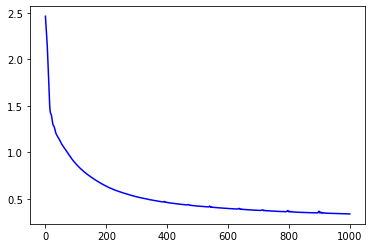

In [52]:

# DEFINIÇÃO DA FUNÇAO DE CUSTO E OTIMIZADOR
learning_rate = 0.0005
criterion = nn.CrossEntropyLoss()
            #nn.NLLLoss()
            #nn.CrossEntropyLoss

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
# optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

#print(x.shape)
#print(y.shape)
#print(y)

# LOOP DE TREINAMENTO
num_epochs =1000
contador_custo = []
for epoch in range(num_epochs):
    
    #forward pass and loos
    y_hat = model(X_train)  
    loss = criterion(y_hat, y_train)
    contador_custo.append(loss)
    
    print(f'Epoch: {epoch} Loss: {loss}')
    
    #backward pass (calcular gradientes)
    loss.backward()

    #update (atualizar os pesos)
    optimizer.step()

    #limpar o otimizador
    optimizer.zero_grad()


# PLOTANDO O GRÁFICO DA FUNÇÃO DE CUSTO
print("GRÁFICO DA FUNÇÃO DE CUSTO")
plt.plot(contador_custo, 'b')
plt.show()

In [ ]:
# Verificar performance de treinamento e testes

In [53]:

"""#Fazer a predição"""
predicoes = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        predicoes.append(y_hat.argmax().item())
    
df = pd.DataFrame({'Y': y_test, 'YHat': predicoes})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df['Correct'].sum() / len(df)

0.884926720289787

In [50]:

"""#Fazer a predição treino"""
predicoes = []
with torch.no_grad():
    for val in X_train:
        y_hat = model.forward(val)
        predicoes.append(y_hat.argmax().item())
    
df = pd.DataFrame({'Y': y_train, 'YHat': predicoes})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df['Correct'].sum() / len(df)

0.8604902991003921

In [54]:
import pickle

In [56]:
pickle.dump(trans, open('scaler/scaler.pkl','wb'))

In [ ]:
#Resultado

# Aplicar o StandardScaler mostrou um resultado muito bom
# Aumentando a quantidade de treinamento e diminuindo o learning rate também mostrou-se melhor
# Aplicar MinMaxScaler mostrou-se pior
# Utilizado o stratify nos dados, para pegar um balanceamento melhor para treino mostrou uma boa melhora